# Importing Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [20]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\wapro\\drinking_water_potability.csv')
dataset.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Exploratory Data analysis

In [21]:
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [23]:
dataset.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [24]:
dataset.replace(np.nan,'0',regex=True,inplace=True)
dataset.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [25]:
dataset['Potability'].unique()

array([0, 1], dtype=int64)

In [26]:
dataset.shape

(3276, 10)

In [27]:
for column in dataset.columns:
    print("{} has {} unique values".format(column,len(dataset[column].unique())))

ph has 2786 unique values
Hardness has 3276 unique values
Solids has 3276 unique values
Chloramines has 3276 unique values
Sulfate has 2496 unique values
Conductivity has 3276 unique values
Organic_carbon has 3276 unique values
Trihalomethanes has 3115 unique values
Turbidity has 3276 unique values
Potability has 2 unique values


# Data visualization

In [76]:

sns.set_style('darkgrid')

Text(0, 0.5, 'count')

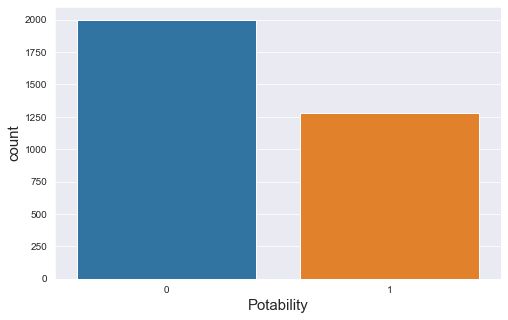

In [77]:
#Value counts of potability
pot_lbl = dataset.Potability.value_counts()

#barplot
plt.figure(figsize=(8,5))
sns.barplot(pot_lbl.index, pot_lbl)
plt.xlabel('Potability',fontsize=15)
plt.ylabel('count',fontsize=15)

Text(0.5, 1.0, 'Correlation Matrix')

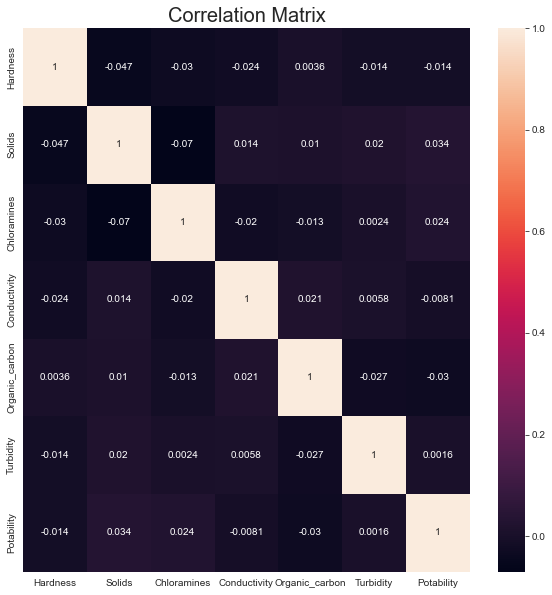

In [78]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)
plt.title('Correlation Matrix',fontsize=20)

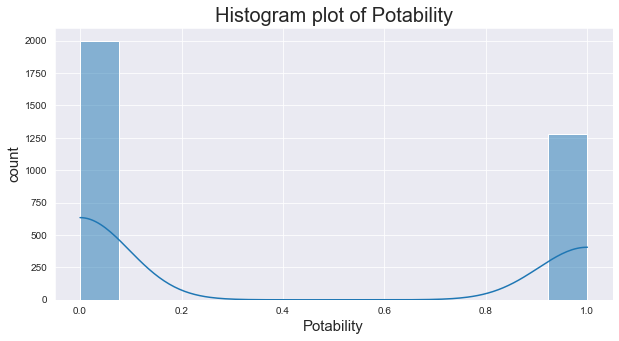

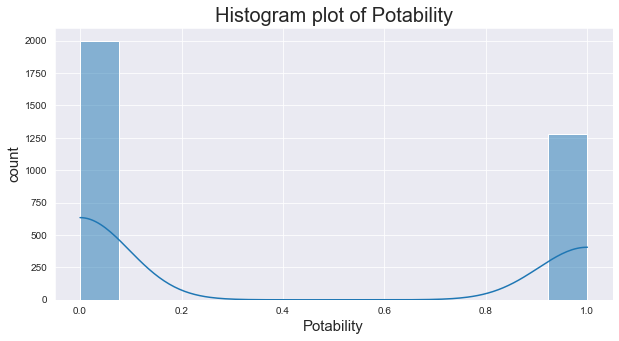

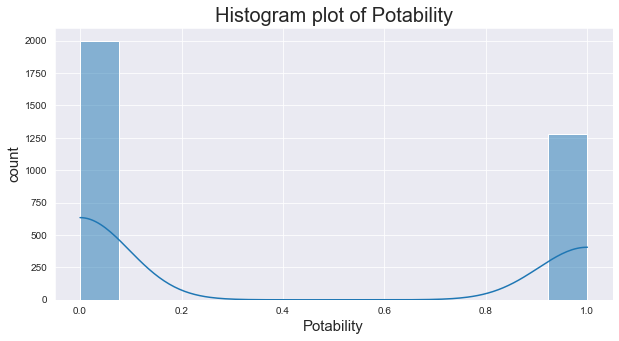

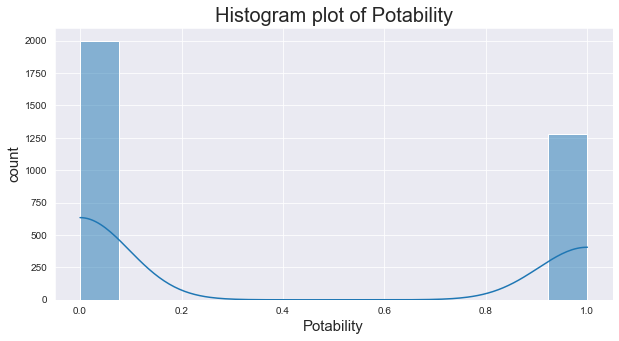

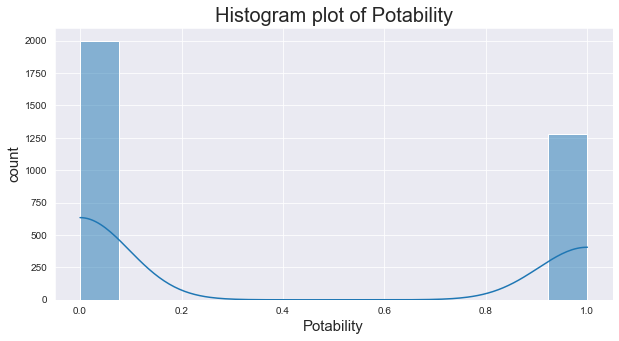

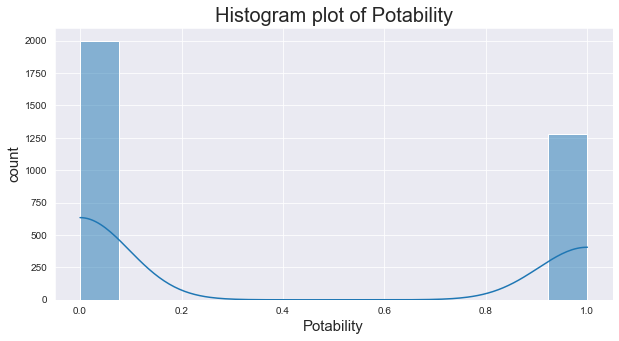

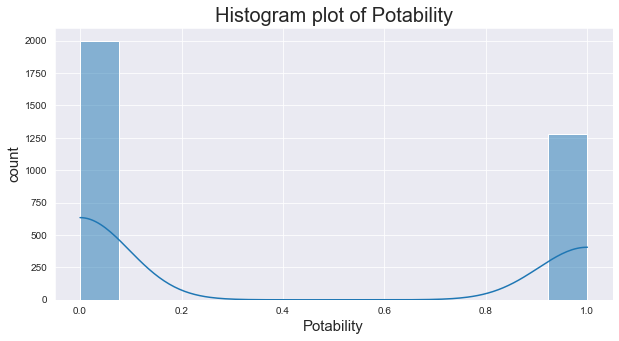

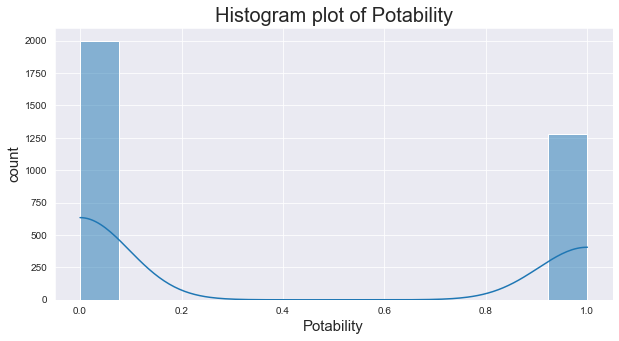

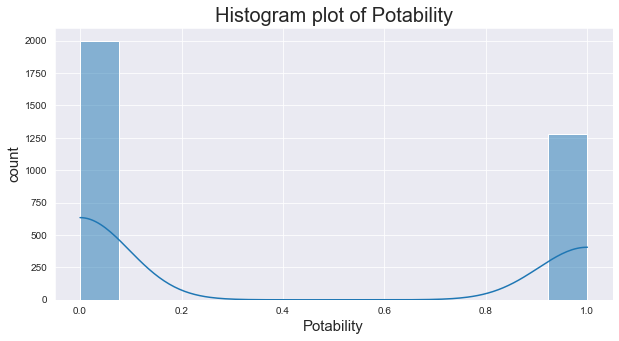

In [79]:
for freature in dataset.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(dataset[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20)

# splitting data and training it and testing

In [80]:
# lets see feature importance
from sklearn.ensemble import ExtraTreesClassifier
x = dataset.drop(['Potability'],axis=1)
y =dataset.Potability

In [81]:
Ext = ExtraTreesClassifier()
Ext.fit(x,y)

ExtraTreesClassifier()

In [82]:
print(Ext.feature_importances_)

[0.11389644 0.11998137 0.11653465 0.11645325 0.11013178 0.10683888
 0.10607009 0.10540344 0.1046901 ]


<AxesSubplot:>

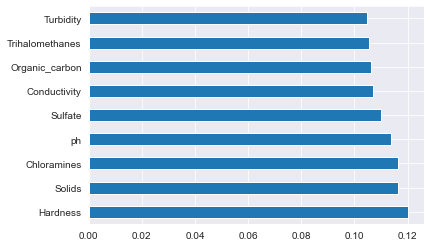

In [83]:
feature = pd.Series(Ext.feature_importances_,index=x.columns)
feature.sort_values(ascending=True).nlargest(10).plot(kind='barh')